In [1]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import tensorflow as tf; 
print(tf.version)

<module 'tensorflow_core._api.v2.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


In [2]:
input_width = 28
input_height = 28

In [3]:
%matplotlib inline

def read_image(filePath):
    image = Image.open(filePath)

    # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.resize
    image = image.resize((input_width, input_height), Image.LANCZOS)

    # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.convert
    image = image.convert("L")

    image = np.asarray(image)

    return np.asarray(image).astype(np.float32) / 255.

def read_images(path):
    files = os.listdir(path)    
    files = [file for file in files if file[-4:] == ".png"]
    random.shuffle(files)
    images = []
    for file in files:
        try:
            images.append(read_image(os.path.join(path, file)))
        except OSError:
            pass
    
    return images

test_samples_per_digit = 0
x_train_arr = []
y_train_arr = []
x_test_arr = []
y_test_arr = []
for i in range(10):
    images = read_images("images/digits/" + str(i))
    print("Digit: " + str(i) + "; Images: " + str(len(images)))
    #plt.imshow(images[0])
    #plt.show()
    idx = 0
    for image in images:
        if idx < test_samples_per_digit:
            x_test_arr.append(image)
            y_test_arr.append(i)  
        else:
            x_train_arr.append(image)
            y_train_arr.append(i)
        idx = idx + 1
    
# convert to numpy types
x_train = np.asarray(x_train_arr)#.astype(np.float32) / 255.
y_train = to_categorical(y_train_arr)
x_test = []
y_test = []
if test_samples_per_digit > 0:
    x_test = np.asarray(x_test_arr)#.astype(np.float32) / 255.
    y_test = to_categorical(y_test_arr)
#print("x_train: " + str(x_train))
#print("y_train: " + str(y_train))
#print("##########################")
#print("x_test: " + str(x_test))
#print("y_test: " + str(y_test))

Digit: 0; Images: 155
Digit: 1; Images: 127
Digit: 2; Images: 118
Digit: 3; Images: 72
Digit: 4; Images: 73
Digit: 5; Images: 81
Digit: 6; Images: 84
Digit: 7; Images: 64
Digit: 8; Images: 42
Digit: 9; Images: 71


In [4]:
def createModel():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (input_height, input_width, 1)))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])
    return model

In [15]:
model = createModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 32)         

In [17]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=False)

if False:
    model.fit(
        x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1),
        y_train,
        epochs=2000,
        batch_size=256)
else:
    model.fit_generator(gen.flow(
        x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1), 
        y_train, batch_size=128, shuffle=True), epochs=50, workers=8, steps_per_epoch=128)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


Using TensorFlow backend.


Train for 128 steps
Epoch 1/50
128/128 [==============================] - 12s 94ms/step - loss: 2.1983 - acc: 0.1987
Epoch 2/50
128/128 [==============================] - 10s 77ms/step - loss: 1.8122 - acc: 0.3616
Epoch 3/50
128/128 [==============================] - 11s 86ms/step - loss: 1.4385 - acc: 0.5093
Epoch 4/50
128/128 [==============================] - 10s 77ms/step - loss: 1.1786 - acc: 0.6010
Epoch 5/50
128/128 [==============================] - 10s 80ms/step - loss: 1.0360 - acc: 0.6559
Epoch 6/50
128/128 [==============================] - 10s 82ms/step - loss: 0.9066 - acc: 0.7004 0s - loss: 0.9075 - a
Epoch 7/50
128/128 [==============================] - 11s 83ms/step - loss: 0.8300 - acc: 0.7292
Epoch 8/50
128/128 [==============================] - 10s 81ms/step - loss: 0.7546 - acc: 0.7543
Epoch 9/50
128/128 [==============================] - 10s 80ms/step - loss: 0.7086 - acc: 0.7687
Epoch 10/50
128/128 [==============================] - 9s 72ms/step - loss: 0.6500 - 

In [12]:
def predict(img):
    result = model.predict(img.reshape(1, img.shape[0], img.shape[1], 1))
    pred = np.argmax(result, axis = 1)[0]
    convidence = result[0][pred]
    return (pred, convidence)

def predict_test(idx):
    result = predict(x_test[idx])
    pred = result[0]
    convidence = result[1]
    expect = y_test_arr[idx]
    correct = expect == pred    
    print("correct: " + str(correct) + 
          "; expcted: " + str(expect) + 
          "; predicted: " + str(pred) + 
          "; confidence: " + str(round(convidence, 2)))
    if not correct or convidence < 0.7:
        plt.imshow(x_test[idx])
        plt.show()
for i in range(len(x_test_arr)):
    predict_test(i)

(100%) -> 0


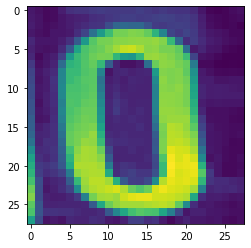

(100%) -> 1


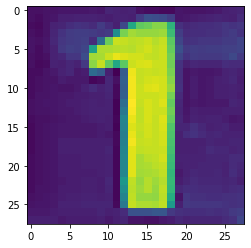

(100%) -> 3


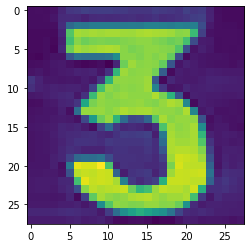

(100%) -> 7


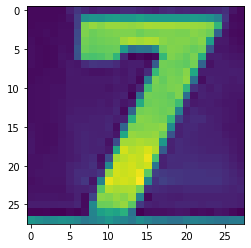

(100%) -> 4


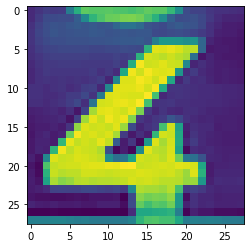

In [18]:
custom_images = read_images("images/meter_digits2")
for img in custom_images:
    result = predict(img)
    print("(" + str(round(result[1] * 100)) + "%) -> " + str(result[0]))
    plt.imshow(img)
    plt.show()

In [19]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
filename = "ocr_model_" + str(input_width) + "x" + str(input_height)
print("writing " + filename + ".tflite")
open(filename + ".tflite", "wb").write(tflite_model)
print("Now you have to call the following in git bash: xxd -i " + filename + ".tflite > " + filename + ".c")

writing ocr_model_28x28.tflite
Now you have to call the following in git bash: xxd -i ocr_model_28x28.tflite > ocr_model_28x28.c
